# A genetic algorithm for optimizing traveling salesman problem (harder case)

https://github.com/luthfishahab/geneticalgorithm

https://www.theprojectspot.com/tutorial-post/applying-a-genetic-algorithm-to-the-travelling-salesman-problem/5

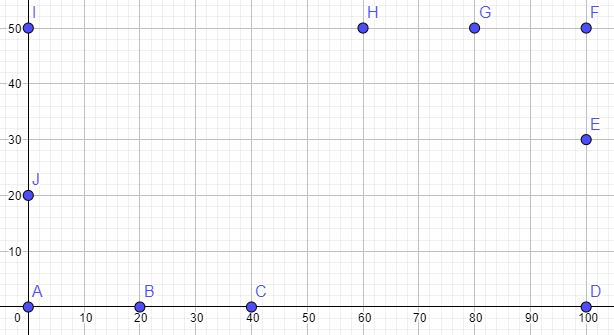

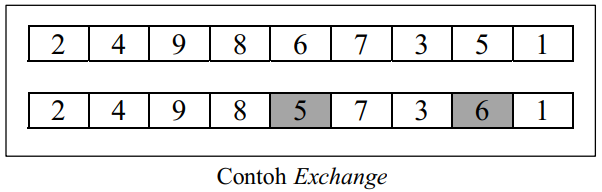

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 20, 40, 100, 100, 100, 80, 60,  0,  0, 40, 40, 60, 50, 30, 90, 10, 20, 60, 80])
y = np.array([0,  0,  0,   0,  30,  50, 50, 50, 50, 20, 20, 30, 20, 25, 10, 15, 30, 40, 40, 40])

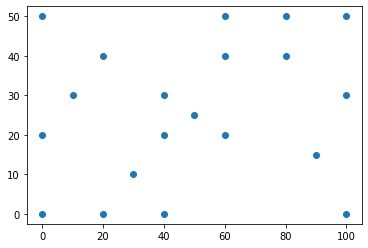

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
# number of cities / points
m = len(x)

# number of chromosomes in population
n = 100

# maximum generation
N = 200

In [5]:
# distance matrix
d = np.zeros((m, m), dtype=int)

for i in range(m):
    for j in range(m):
        d[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

d

array([[  0,  20,  40, 100, 104, 111,  94,  78,  50,  20,  44,  50,  63,
         55,  31,  91,  31,  44,  72,  89],
       [ 20,   0,  20,  80,  85,  94,  78,  64,  53,  28,  28,  36,  44,
         39,  14,  71,  31,  40,  56,  72],
       [ 40,  20,   0,  60,  67,  78,  64,  53,  64,  44,  20,  30,  28,
         26,  14,  52,  42,  44,  44,  56],
       [100,  80,  60,   0,  30,  50,  53,  64, 111, 101,  63,  67,  44,
         55,  70,  18,  94,  89,  56,  44],
       [104,  85,  67,  30,   0,  20,  28,  44, 101, 100,  60,  60,  41,
         50,  72,  18,  90,  80,  41,  22],
       [111,  94,  78,  50,  20,   0,  20,  40, 100, 104,  67,  63,  50,
         55,  80,  36,  92,  80,  41,  22],
       [ 94,  78,  64,  53,  28,  20,   0,  20,  80,  85,  50,  44,  36,
         39,  64,  36,  72,  60,  22,  10],
       [ 78,  64,  53,  64,  44,  40,  20,   0,  60,  67,  36,  28,  30,
         26,  50,  46,  53,  41,  10,  22],
       [ 50,  53,  64, 111, 101, 100,  80,  60,   0,  30,  50,  

In [6]:
def createPopulation():
    pop = np.zeros((n, m), dtype=int)
    
    for i in range(n):
        pop[i] = np.random.permutation(m)
    
    pop = pd.DataFrame(pop)
    
    return pop

In [7]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)
    
    for k in range(n):
        a = pop.loc[k]

        b = 0
        for i in range(0, m-1):
            b += d[a[i], a[i+1]]
        b += d[a[m-1], a[0]]

        fitness[k] = b
    
    pop['fitness'] = fitness
    
    return pop

In [8]:
def randomSelection(m):
    position = np.random.permutation(m)
    
    return position[0], position[1]

In [9]:
def crossover(pop):
    popc = pop.copy()
    
    for i in range(n):
        a, b = randomSelection(m)    #ambil random index untuk pertukaran gen
        s = min(a, b) 
        t = max(a, b)
        
        x, y = randomSelection(n)    #ambil random kromosom 
        temp1 = list(pop.loc[x][s:t+1])
        temp2 = []
        for val in pop.loc[y]:
             if val not in temp1:
                temp2 += [val]
        temp1 += temp2
        
        popc.loc[i] = temp1
    return popc

In [10]:
def mutation(popc):
    popm = popc.copy()
    
    for i in range(n):
        a, b = randomSelection(m)
        
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

In [11]:
def combinePopulation(pop, popc, popm):
    popAll = pop.copy()
    popAll = popAll.append(popc)
    popAll = popAll.append(popm)

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [12]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    
    popAll.index = range(len(popAll))

    return popAll

In [13]:
def elimination(popAll):
    pop = popAll.head(n)
    
    return pop

In [14]:
def plotSolution(pop):
    solution = pop.loc[0]
    solution = solution.to_numpy()

    a = np.zeros(m+1, dtype=int)
    b = np.zeros(m+1, dtype=int)

    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]

    a[m] = a[0]
    b[m] = b[0]

    plt.plot(a, b, marker = 'o')
    plt.show()

Solusi pada populasi awal
    0   1   2  3  4  5   6  7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  10  14  18  4  0  9  19  1  3  16  ...  15  12   5   8   2   7  13  17   6   

   fitness  
0     1097  

[1 rows x 21 columns]


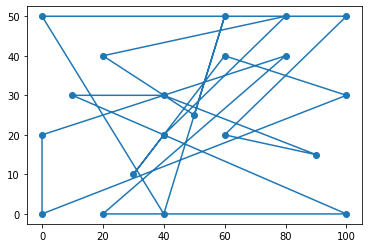


Solusi terbaik pada populasi generasi ke-10
   0   1  2  3  4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  2  15  3  4  5  6  7  12  16  17  ...   9  14  10  11  19  13  18   0   1   

   fitness  
0      565  

[1 rows x 21 columns]


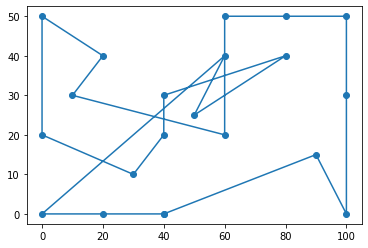


Solusi terbaik pada populasi generasi ke-20
   0  1  2  3   4   5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  1  0  9  8  16  10  2  12  4  15  ...   5   6  19   7  18  13  11  17  14   

   fitness  
0      456  

[1 rows x 21 columns]


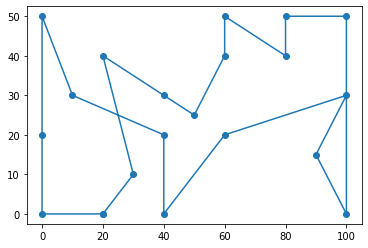


Solusi terbaik pada populasi generasi ke-30
   0  1  2   3  4  5   6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  3  4  5  19  6  7  18  13  2  17  ...  16   9   0   1  14  10  11  12  15   

   fitness  
0      406  

[1 rows x 21 columns]


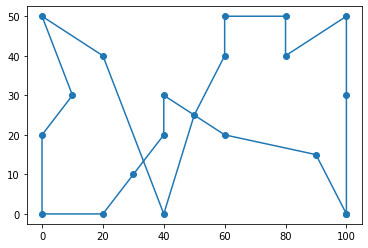


Solusi terbaik pada populasi generasi ke-40
   0   1  2  3  4   5  6   7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  3  15  4  5  6  19  7  18  13  11  ...   8  16   9   0   1  14  10   2  12   

   fitness  
0      387  

[1 rows x 21 columns]


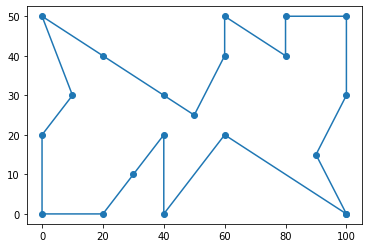


Solusi terbaik pada populasi generasi ke-50
    0  1  2  3  4   5  6   7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  15  3  4  5  6  19  7  18  10  14  ...   1   0   9  16   8  17  11  13  12   

   fitness  
0      378  

[1 rows x 21 columns]


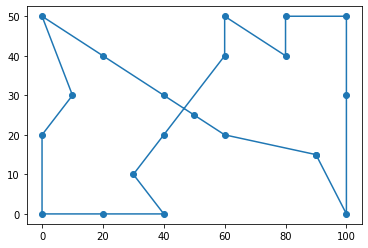


Solusi terbaik pada populasi generasi ke-60
    0  1  2  3  4   5  6   7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  15  3  4  5  6  19  7  18  10  14  ...   1   0   9  16   8  17  11  13  12   

   fitness  
0      378  

[1 rows x 21 columns]


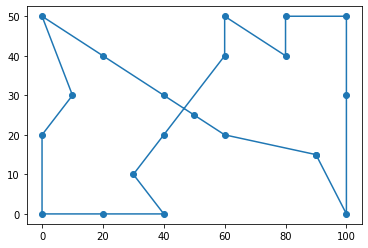


Solusi terbaik pada populasi generasi ke-70
    0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  13  12  3  15  4  5  6  19  7  18  ...  17   8  16   9   0   1   2  14  10   

   fitness  
0      374  

[1 rows x 21 columns]


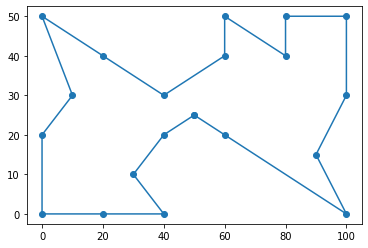


Solusi terbaik pada populasi generasi ke-80
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


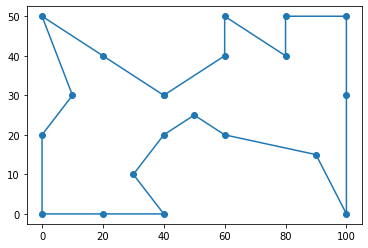


Solusi terbaik pada populasi generasi ke-90
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


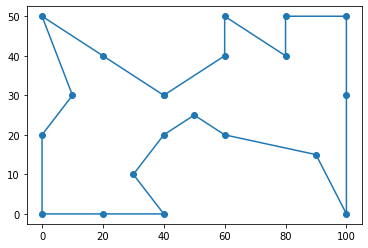


Solusi terbaik pada populasi generasi ke-100
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


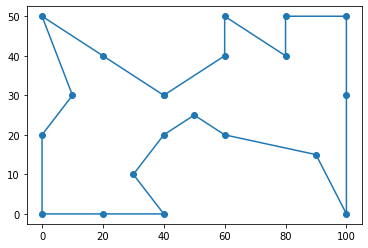


Solusi terbaik pada populasi generasi ke-110
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


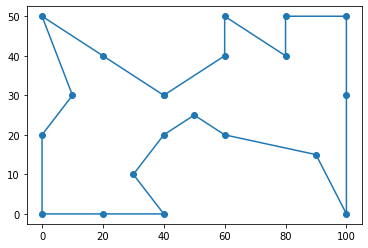


Solusi terbaik pada populasi generasi ke-120
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


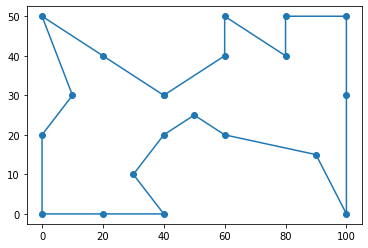


Solusi terbaik pada populasi generasi ke-130
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


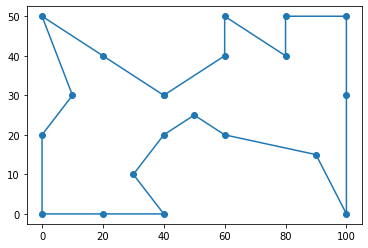


Solusi terbaik pada populasi generasi ke-140
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


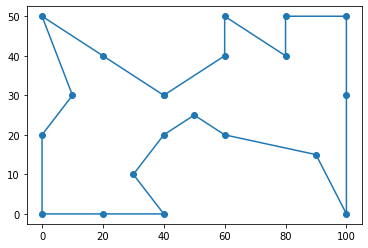


Solusi terbaik pada populasi generasi ke-150
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


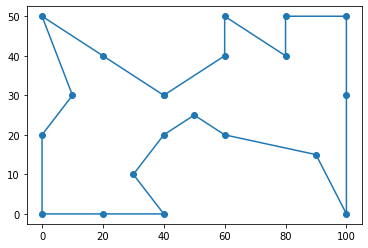


Solusi terbaik pada populasi generasi ke-160
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


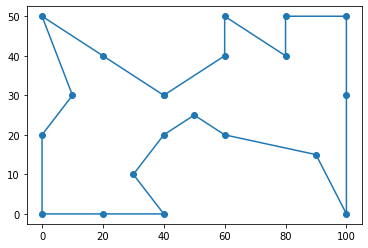


Solusi terbaik pada populasi generasi ke-170
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


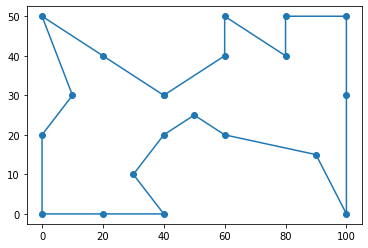


Solusi terbaik pada populasi generasi ke-180
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


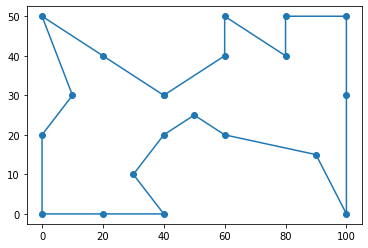


Solusi terbaik pada populasi generasi ke-190
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


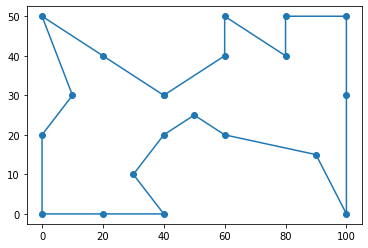


Solusi terbaik pada populasi generasi ke-200
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


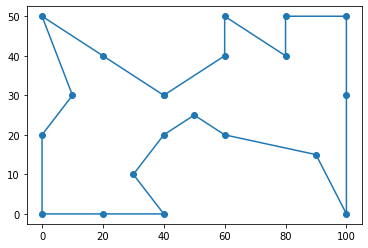


Solusi terbaik pada populasi akhir
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  11  17  8  16  9  0  1  2  14  10  ...  12  15   3   4   5   6  19   7  18   

   fitness  
0      372  

[1 rows x 21 columns]


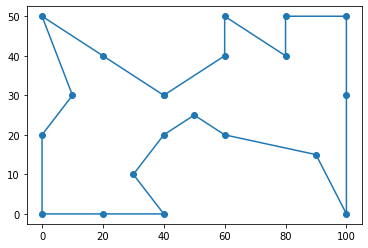

In [15]:
pop = createPopulation()
pop = fitness(pop)
print('Solusi pada populasi awal')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    popc = crossover(pop)
    popc = fitness(popc)

    popm = mutation(pop)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popc, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)
    
    if i % 10 == 0:
        print()
        print('Solusi terbaik pada populasi generasi ke-'+ str(i))
        print(pop.head(1))
        plotSolution(pop)

print()
print('Solusi terbaik pada populasi akhir')
print(pop.head(1))
plotSolution(pop)